<a href="https://colab.research.google.com/github/NagamallaVinay/Task-4/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4: Classification with Logistic Regression**.

Objective: Build a binary classifier using logistic regression.

Tools:  Scikit-learn, Pandas, Matplotlib

# **1. Choose a binary classification dataset.**
We will use the provided data.csv file, which contains features for a binary classification task

In [16]:
#Import required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, roc_auc_score

**Importing .CSV file into Notebook**

In [17]:
#Import Dataset
dataset = pd.read_csv('Titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
#Drop irrelevant data or un-neccesary data
dataset1 = dataset.drop(columns=['Cabin','Name','PassengerId','Ticket'], axis=1)
dataset1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [19]:
#Convert String to categorical values
lb = LabelEncoder()
dataset1['Sex'] = lb.fit_transform(dataset1['Sex'])
dataset1['Embarked'] = lb.fit_transform(dataset1['Embarked'])
dataset1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [20]:
dataset1.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,0


In [21]:
dataset1.fillna(dataset1.mean(), inplace=True)
dataset1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [22]:
dataset1.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# **2: Train/test split and standardize features**.

We will split the data into training and testing sets, and then standardize the features to have a mean of 0 and a standard deviation of 1.

In [23]:
X = dataset1.drop(columns=['Survived'], axis=1)
y = dataset1['Survived']

#Standardize or normalize the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

#split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# **3: Fit a Logistic Regression model.**

We will initialize and train a Logistic Regression model using the standardized training data.

In [24]:
Lg = LogisticRegression()
Lg.fit(X_train, y_train)

LogisticRegression()

# **4: Evaluate with confusion matrix, precision, recall, ROC-AUC.**

We will use the trained model to make predictions on the test set and then evaluate its performance using standard classification metrics.

In [25]:
prediction = Lg.predict(X_test)
print("Accuracy",accuracy_score(y_test, prediction))
print("Classification Report",classification_report(y_test, prediction))
print("Recall Score",recall_score(y_test, prediction))
print("Precision Score",precision_score(y_test, prediction))
# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = Lg.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"ROC-AUC Score: {roc_auc}")

Accuracy 0.7988826815642458
Classification Report               precision    recall  f1-score   support

           0       0.82      0.85      0.83       106
           1       0.77      0.73      0.75        73

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Recall Score 0.726027397260274
Precision Score 0.7681159420289855
ROC-AUC Score: 0.8387826311708453


# **5: Tune threshold and explain sigmoid function.**

We will demonstrate how changing the classification threshold affects performance and then explain the sigmoid function.

The default threshold for logistic regression is 0.5. Let's see how changing it to 0.3 impacts precision and recall.

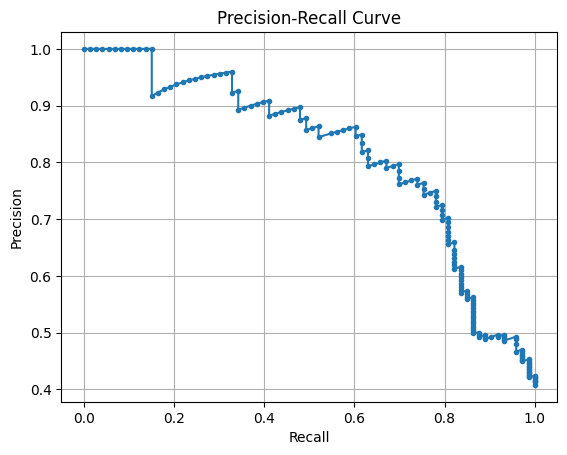

Threshold for recall >= 0.8: 0.005912315774916006
Optimal threshold based on F1-score: 0.43258127290425524

Evaluation with Tuned Threshold:
Accuracy 0.8044692737430168
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       106
           1       0.75      0.78      0.77        73

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179

Recall Score 0.7808219178082192
Precision Score 0.75


In [26]:


precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# You can choose a threshold based on the precision-recall curve or other criteria
# For example, to find the threshold that maximizes precision for a certain recall:
# Find the threshold that gives a recall of at least 0.8
target_recall = 0.8
threshold_for_target_recall = thresholds[np.where(recall >= target_recall)[0][0]]
print(f"Threshold for recall >= {target_recall}: {threshold_for_target_recall}")

# Or, if you want to maximize the F1-score, you could calculate and plot it
f1_scores = 2 * (precision * recall) / (precision + recall)
# Find the threshold that maximizes the F1-score
optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_index]
print(f"Optimal threshold based on F1-score: {optimal_threshold}")

# Now you can use the chosen threshold to make predictions
y_pred_tuned = (y_pred_prob >= optimal_threshold).astype(int)

# Evaluate the model with the tuned threshold
print("\nEvaluation with Tuned Threshold:")
print("Accuracy", accuracy_score(y_test, y_pred_tuned))
print("Classification Report")
print(classification_report(y_test, y_pred_tuned))
print("Recall Score", recall_score(y_test, y_pred_tuned))
print("Precision Score", precision_score(y_test, y_pred_tuned))


# **sigmoid function**
The sigmoid function  is fundamental to logistic regression. It takes any real-valued input and maps it to an output between 0 and 1, which can be interpreted as a probability.